<IPython.core.display.Javascript object>


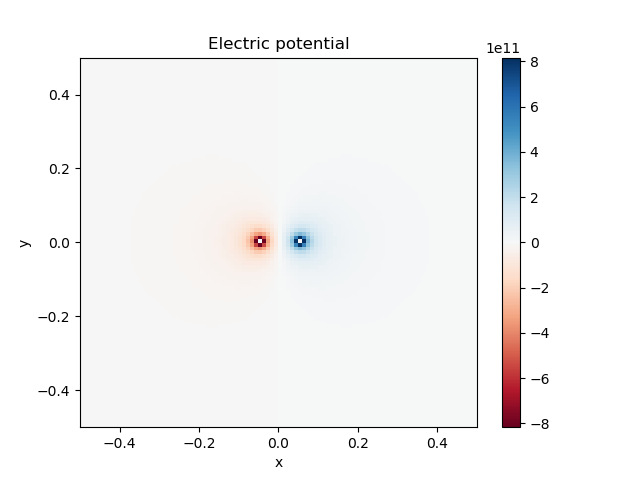

<IPython.core.display.Javascript object>


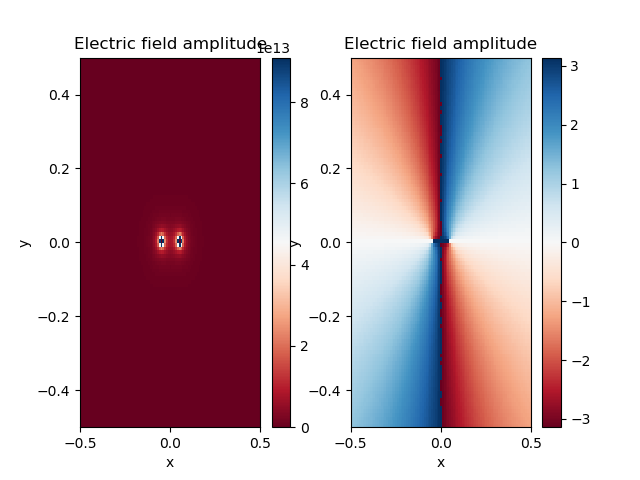

None


In [2]:
# Author: Carlos Perez
#=======================================
import numpy as np
import matplotlib.pyplot as plt
import math
#=======================================
#ELECTRIC POTENTIAL
#=======================================
# Calculate electric potential of a charge 'q', at a distance 'r'
def epotent(q,r):
    eps0=8.854187817e-12
    return 1/(4*np.pi*eps0)*q/r

# Calculate the combined e-potential at r1 from q1, and r2 from q2
def epotent2(q1,q2,r1,r2):
    return epotent(q1,r1)+epotent(q2,r2)

# Calculate the e-potential at (x,y), created by charge q1 at (x1,y1), and q2 at (x2,y2)
def epotent2xy(x,y,q1,x1,y1,q2,x2,y2):
    r1=np.sqrt((x-x1)**2+(y-y1)**2)
    r2=np.sqrt((x-x2)**2+(y-y2)**2)
    return epotent2(q1,q2,r1,r2)
#==========================================
%matplotlib notebook
#==========================================
# setup conditions
q1=-1
x1=-0.05
y1=0

q2=1
x2=0.05
y2=0

# create grid 
x=np.arange(-.5,+0.51,0.01)
y=np.arange(-.5,+0.51,0.01)

potential=np.zeros((101,101)) #data will be stored here

for indx in np.arange(101):
    for indy in np.arange(101):
        gridx=x[indx]
        gridy=y[indy]
        if not((indx==45)and(indy==50)): #skip left charge
            if not((indx==55)and(indy==50)): #skip right charge
                potential[indx][indy]=epotent2xy(gridx,gridy,q1,x1,y1,q2,x2,y2)
#==============================================
# plot using pcolor
fig,ax=plt.subplots(1,1)
c=ax.pcolor(x, y, potential.transpose(), cmap='RdBu', vmin=potential.min(), vmax=-potential.min())
ax.set_title('Electric potential')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(c, ax=ax)
#================================================
# ELECTRIC FIELD
#================================================
# calculate e-potential with fixed q1,x1,y1,q2,x2,y2
def epxy(x,y):
    q1=-1
    x1=-0.05
    y1=0
    q2=1
    x2=0.05
    y2=0
    return epotent2xy(x,y,q1,x1,y1,q2,x2,y2)

# calculate h from r
def crt_h(r):
    #create h from r to fit the precision requirement
    return 2*np.cbrt(1e-16/6)*r

# calculate field by potential derivative
def ef(func_ep,x,y,h):
    #assume func_ep requires 2 inputs: x and y
    efx=(func_ep(x-h,y)-func_ep(x+h,y))/(2*h)
    efy=(func_ep(x,y-h)-func_ep(x,y+h))/(2*h)
    return efx,efy
#=================================================
# setup conditions
q1=-1
x1=-0.05
y1=0
q2=1
x2=0.05
y2=0

# create grid
x = np.arange(-0.5,+0.51,0.01)
y = np.arange(-0.5,+0.51,0.01)

# prepare storage matrices
fieldx=np.zeros((101,101)) #data will be stored here
fieldy=np.zeros((101,101))

for indx in np.arange(101):
    for indy in np.arange(101):
        gridx=x[indx]
        gridy=y[indy]
        if not((indx==45)and(indy==50)):
            if not((indx==55)and(indy==50)):
                rmax=np.sqrt(np.array([(gridx-x1)**2+(gridy-y1)**2,(gridx-x2)**2+(gridy-y2)**2]).max()) # use the farther charge to determine r
                h=crt_h(rmax)
                efx,efy=ef(epxy,gridx,gridy,h) # get x&y-field components
                fieldx[indx][indy]=efx
                fieldy[indx][indy]=efy
                
fieldr=np.sqrt(fieldx**2+fieldy**2) # field r-component
fieldtheta=np.arctan2(fieldy,fieldx) # field direction from -pi to +pi
#====================================================
fig,ax=plt.subplots(1,2)

#plot amplitude
c0=ax[0].pcolor(x, y, fieldr.transpose(), cmap='RdBu', vmin=0, vmax=fieldr.max())
ax[0].set_title('Electric field amplitude')
ax[0].axis([x.min(), x.max(), y.min(), y.max()])
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
fig.colorbar(c0, ax=ax[0])

#plot direction
c1=ax[1].pcolor(x, y, fieldtheta.transpose(), cmap='RdBu', vmin=-np.pi, vmax=np.pi)
ax[1].set_title('Electric field amplitude')
ax[1].axis([x.min(), x.max(), y.min(), y.max()])
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
fig.colorbar(c1, ax=ax[1])
#=====================================================
print(plt.show())